In [25]:
import requests
import json

url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/all-projects/all-access/all-agents/daily/2016010100/2020123100'
headers = {'User-Agent': 'Coolbeans (kabibi3@gmail.com)'}

response = requests.get(url, headers=headers)

In [21]:
## Cleaning

In [26]:
import pandas as pd
items = json.loads(response.text)
data = items['items']
df = pd.DataFrame(data)
df = df.drop(columns=['project', 'access', 'agent', 'granularity'])
df['timestamp'] = df['timestamp'].map(lambda x: str(x)[:-2])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')


In [27]:
import seaborn as sns
color = sns.color_palette("crest")

<AxesSubplot: title={'center': 'Wiki Search Numbers'}, xlabel='timestamp'>

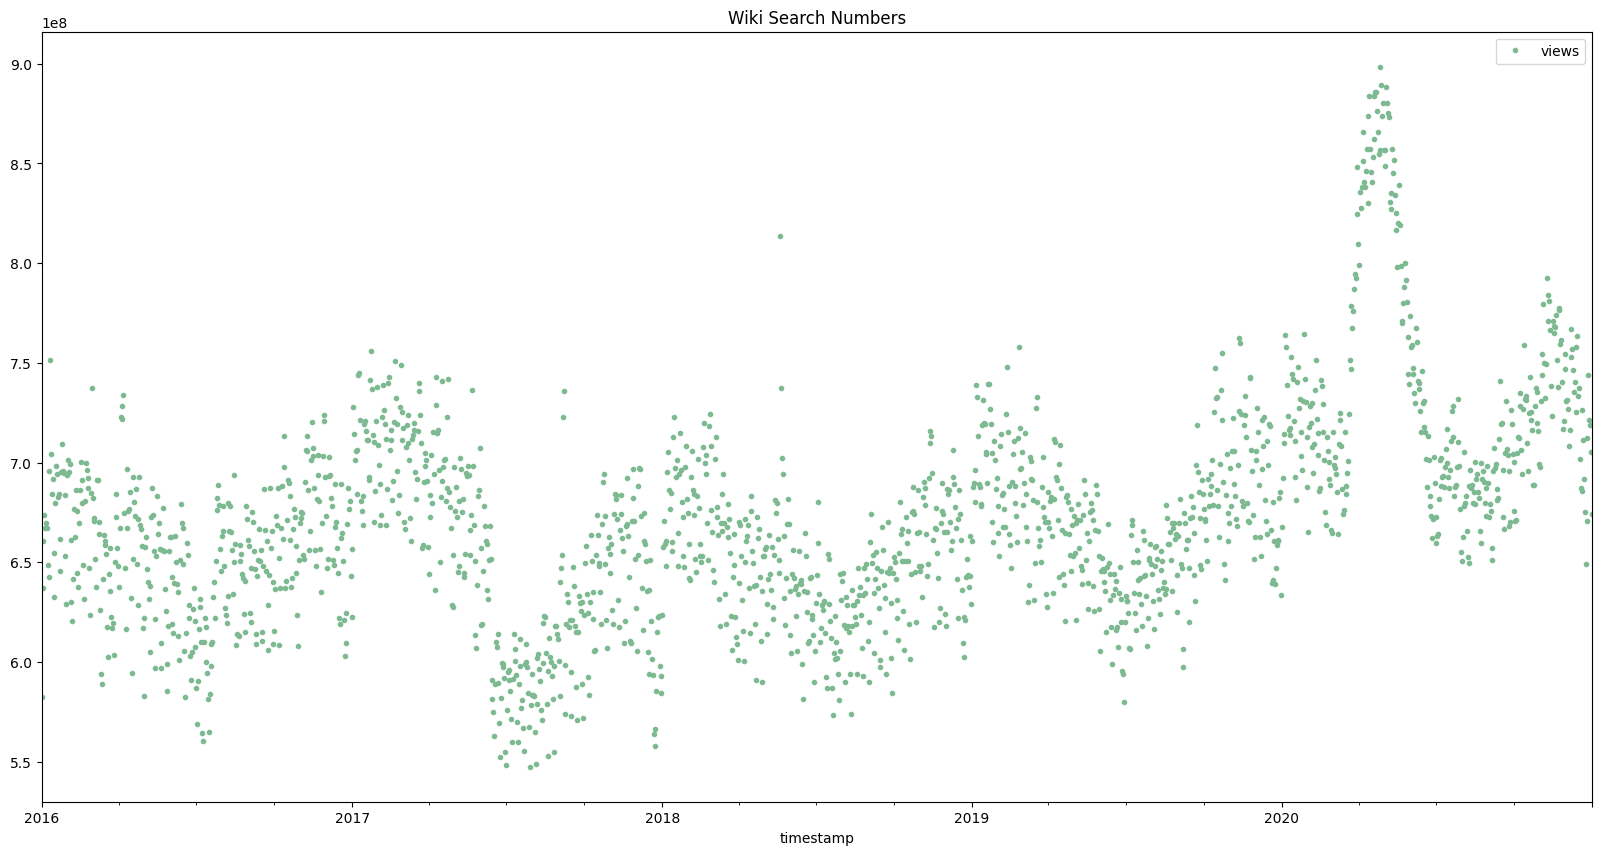

In [33]:
df.plot(style='.', figsize=(20,10), color=color[0], title='Wiki Search Numbers')
